In [144]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas

cats = {
    "EDIP-Gold": "Au",
    "EDIP-Copper": "Cu",
    #"7122:Gold": "Gold Content",
    "CExD - metals": "CExD",
    "CED - total": "CED",
    "ADP": "ADP",
    "ADP-Minerals- Total": "ADP-Mins",
    "EI-Minerals- Total": "ADP-EI",
    "EI-Minerals-Precious Metals": "ADP-EI-PM",
    "SR-Minerals- Total": "ADP-SR",
    "GPR-Minerals- Total": "GPSR",
    "CML-climate change (GWP 100a)": "GWP",
    "EcoIndicator 99 (E - E) - total":"E99T",
    "ReCiPe Endpoint (E - A) - total (total)": "ReCiPe",
}


ps_list = [
    "3204-CPU, mounted mainboard",
    "3208-Mainboard",
    "3211-PCB mounted mainboard",
    "3219-PCB, for power supply unit",
    "4440-Server, 1U, no storage",
    "4443-Server, 2U, storage",
    "4455-Blade (Ref. Unit)",
    "5101-KDO-IT",
    # "5201-KDO-Climatization",
    #"5301-KDO-Energy Supply",
    # "5401-KDO-Infrastructure",
    "6001-KDO",
    "6003-RZ1"
]

FONTSIZE = 8

In [145]:
import scipy.stats as st
import numpy as np
def get_best_distribution(data):
    # dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "lognorm"]
    dist_names = ["norm","lognorm"]
    dist_results =[]
    dist_results_dict = {}
    params = {}
    log = False


    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)

        #print("p value for "+addendum+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
        dist_results_dict[dist_name]=p

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    #print("Best fitting distribution: "+str(best_dist))
    #print("Best p value: "+ str(best_p))
    #print("Parameters for the best fit: "+ str(params[best_dist]))

    #return best_dist, best_p, params[best_dist]
    return dist_results_dict

In [146]:
#base= "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Base", ps_name)


#df_mc_base=pd.read_csv(base)

dict_res = {}
df_=[]
for ps_name in ps_list:
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    df_mc_corr=pd.read_csv(corr)

    for col in cats.keys():
        data = df_mc_corr[col]
        data = [x for x in data if x>0]
        mean = sum(data)/len(data)
        data = [np.log(x) for x in data if x>0]
        #data = [x for x in data if x<3*mean]
        dist_results = get_best_distribution(data)
        
        dict_res[cats[col]]=dist_results
    df = pd.DataFrame(dict_res)

    df=df.transpose()
    logn_tes= df[["norm"]]
    logn_tes.rename(columns={"norm":ps_name},inplace=True)
    df_.append(logn_tes)

df_final = pd.concat(df_,axis=1)
df_final

,"3204-CPU, mounted mainboard",3208-Mainboard,3211-PCB mounted mainboard,"3219-PCB, for power supply unit","4440-Server, 1U, no storage","4443-Server, 2U, storage",4455-Blade (Ref. Unit),5101-KDO-IT,6001-KDO,6003-RZ1
Au,2.624343e-03,1.575450e-01,1.111740e-02,5.203676e-02,9.422269e-02,0.000000e+00,1.068145e-01,0.000000e+00,0.000000e+00,0.000000e+00
Cu,5.764811e-02,1.440471e-01,3.271613e-02,3.455018e-03,1.071759e-01,0.000000e+00,2.386380e-02,0.000000e+00,0.000000e+00,0.000000e+00
CExD,3.769845e-02,3.280438e-01,4.186850e-02,3.066746e-02,4.855472e-02,5.574456e-23,2.101559e-01,9.636893e-35,4.421921e-51,5.589918e-67
CED,3.877690e-13,4.855174e-13,2.651614e-01,4.121185e-13,2.083209e-18,0.000000e+00,1.932514e-01,0.000000e+00,0.000000e+00,0.000000e+00
ADP,1.540759e-25,7.802011e-16,1.407818e-03,1.491905e-10,2.789082e-22,1.773162e-284,1.158630e-01,3.787372e-230,4.357659e-321,1.101486e-171
ADP-Mins,2.988116e-02,2.168584e-02,3.822577e-03,1.243411e-01,5.580552e-01,8.943083e-81,7.560075e-02,6.125082e-95,2.840815e-77,4.728786e-126
ADP-EI,8.586358e-02,4.269289e-03,5.687638e-03,1.704523e-01,2.832708e-01,4.744314e-44,1.923788e-01,2.950682e-55,5.741865e-129,4.603452e-64
ADP-EI-PM,6.823836e-04,1.888306e-01,3.780528e-02,4.918586e-02,2.099022e-01,0.000000e+00,5.224913e-02,0.000000e+00,0.000000e+00,0.000000e+00
ADP-SR,1.149811e-04,5.517605e-05,9.628204e-04,1.604506e-01,2.211541e-01,4.385944e-60,6.600621e-02,2.774042e-58,2.030529e-94,7.265115e-93
GPSR,1.664569e-02,9.536762e-04,1.011501e-02,3.608591e-02,1.642434e-01,8.855424e-274,1.347132e-01,0.000000e+00,4.526200e-286,4.700624e-273


In [147]:
df_final.to_excel("statistical_test2.xlsx")

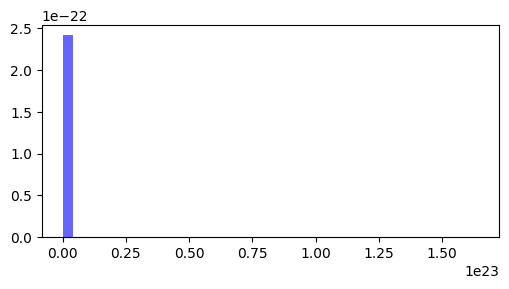

2.2658159706566995e+23


In [148]:
min(df_mc_corr["CED - total"])
max(df_mc_corr["CED - total"])
cm = 1/2.54
col = "GPR-Minerals- Total"
data = df_mc_corr[col]
data = [x for x in data if x>0]
mean = sum(data)/len(data)
data = [x for x in data if x<3*mean]
fig,ax = plt.subplots(figsize=(15*cm, 7*cm))
ax.hist(data, bins=40, density=True, alpha=0.6, color="b")
plt.show()
print(mean)